In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# definiciones

In [2]:
def get_data(data_path):
    '''returns a DataFrame with search tracks'''
    data = pd.read_json(data_path)
    data = pd.DataFrame.from_dict(data['__collections__']["search_track"])
    return data


def preprocess_data(data):
    data = data.T
    data = data.drop(columns = ['user_longitude', 'user_latitude', '__collections__'])
    data.reset_index(level=0, inplace=True)
    data.drop(columns="index")
    data['search_method'] = data['search_method'].convert_dtypes()
    
   
    data.drop(columns='index', inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True, errors='coerce')
    data['arrive'] = pd.to_datetime(data['arrive'], utc=True, errors='coerce')
    data['leave'] = pd.to_datetime(data['leave'], utc=True, errors='coerce')
    data['timestamp'] = data.timestamp.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['arrive'] = data.arrive.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['leave'] = data.leave.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['arrive'] = pd.to_datetime(data['arrive'])
    data['leave'] = pd.to_datetime(data['leave'])
    data = data[data['uid'] != 'W2UoC9eld8MNS08rn8W2KVqKCYB2']
    data = data[data['uid'] != 'REwY2MGhNFSmVq4smD6dgXBniu83']
    data = data[data['uid'] != 'RMnlCQYA06TyfsrGhw8Rscp6dTp1']
    data = data[data['uid'] != 'BLLbW2aUT4Xd5Kyu4lUX98MMget1']
    data = data[data['search_method'] != 'startup']

    return data

def preproc(data_path):
    data = get_data(data_path)
    return preprocess_data(data)

def search_neighborhood(neighborhood, coordinates):

    bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')
    neighborhood = neighborhood.upper()
    gpd_data = gpd.GeoDataFrame(coordinates,
                         geometry = gpd.points_from_xy(coordinates.search_longitude, coordinates.search_latitude))
    reservas_bsas = gpd_data[['geometry']]
    reservas_bsas = reservas_bsas.set_crs("EPSG:4326")

    if neighborhood == 'CIUDAD':
        df_barrio = bsas_map
        fig,ax = plt.subplots(figsize = (15,16))
        bsas_map.plot(ax=ax, color='lightgrey')
        gpd_data.plot(ax=ax, markersize=5, color='red')
        ax.set_xlim([-58.550, -58.325])
        ax.set_ylim([-34.700, -34.525])
        plt.show()

    else:

        try:
            df_barrio = bsas_map[bsas_map['BARRIO'] == neighborhood]
            reservas_barrio = reservas_bsas.within(df_barrio)
            cond_reservas_barrio = gpd_data.apply(lambda x: df_barrio.contains(x.geometry), axis=1)
            gpd_data['reservas_barrio'] = cond_reservas_barrio
            gpd_data = gpd_data[gpd_data.reservas_barrio == True]
            #fig,ax = plt.subplots(figsize = (15,16))
            #bsas_map.plot(ax=ax, color='lightgrey')
            #gpd_data.plot(ax=ax, markersize=5, color='red')
            #ax.set_xlim([-58.550, -58.325])
            #ax.set_ylim([-34.700, -34.525])
            #plt.show()
        except ValueError:
            print(f"Please enter another neighborhood, {neighborhood} not found")


    return gpd_data

## cargo data

In [3]:
data = preproc('../../raw_data/dataBackup.json')



In [4]:
bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')

In [5]:
# vemos que barrio tiene nombres en mayúscula y minúscula
bsas_map.BARRIO = bsas_map.BARRIO.map(lambda x: x.upper())

bsas_map.BARRIO.sort_values()

# visualización

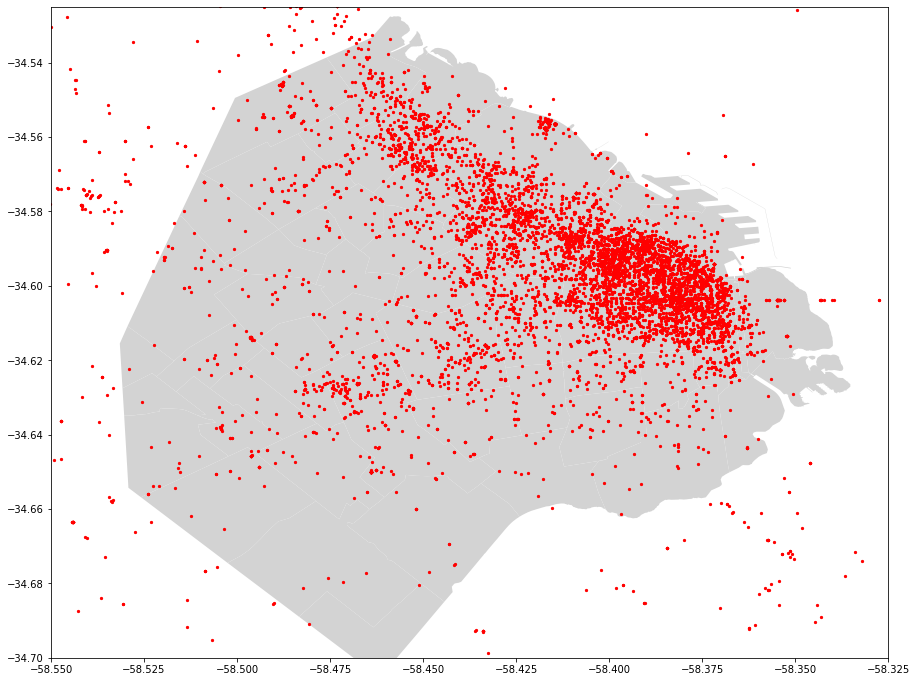

In [6]:
ciudad = search_neighborhood('CIUDAD', data)

# dataset

In [10]:
ciudad

,search_longitude,search_latitude,timestamp,leave,arrive,search_method,uid,geometry
0,-58.404267,-34.614640,2021-03-28 16:30:39,2021-03-28 17:30:13,2021-03-28 16:30:13,google,unauthenticated,POINT (-58.40427 -34.61464)
4,-58.440447,-34.620694,2021-01-31 22:35:42,2021-02-28 17:32:00,2021-02-28 15:56:00,google,None,POINT (-58.44045 -34.62069)
5,-58.418288,-34.581668,2021-02-13 15:13:03,2021-02-13 16:12:45,2021-02-13 15:12:45,searchInThisArea,e8itgepSU1YX6Q48HtrDpz76OXr1,POINT (-58.41829 -34.58167)
6,-58.398826,-34.608031,2021-03-10 23:58:56,2021-03-11 00:58:33,2021-03-10 23:58:33,searchInThisArea,None,POINT (-58.39883 -34.60803)
7,-59.116541,-34.567099,2021-04-02 21:38:24,2021-04-02 22:31:09,2021-04-02 21:31:09,searchInThisArea,None,POINT (-59.11654 -34.56710)
...,...,...,...,...,...,...,...,...
21124,-58.381600,-34.603700,2021-03-15 15:33:51,2021-03-15 16:33:43,2021-03-15 15:33:43,searchInThisArea,None,POINT (-58.38160 -34.60370)
21128,-58.425900,-34.605969,2021-03-26 19:12:39,2021-03-26 20:11:33,2021-03-26 19:11:33,searchInThisArea,MSVmzP7Wb9d8RJ7kueNFZnq9zTj1,POINT (-58.42590 -34.60597)
21130,-58.383415,-34.591915,2021-01-23 04:12:43,2021-01-23 05:15:18,2021-01-23 04:15:18,this_area,unauthenticated,POINT (-58.38341 -34.59192)
21132,-58.425847,-34.631331,2021-03-21 19:45:08,2021-03-21 20:45:07,2021-03-21 19:45:07,searchInThisArea,byadzYTQX7YaABRFTAXPYz8UKCI2,POINT (-58.42585 -34.63133)


# otro approach

In [11]:
def filtrador(barrios):
    #cargo el dataset entero
    gpd_data = gpd.GeoDataFrame(data,
                         geometry = gpd.points_from_xy(data.search_longitude, data.search_latitude))
    
    
    bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')

    bsas_map.BARRIO = bsas_map.BARRIO.map(lambda x: x.upper()) #hago upper todo
    #elimino lo necesario y seteo el barrio como índice para fácil acceso
    bsas_map =bsas_map.set_index('BARRIO').drop(columns = ['COMUNA','GEOJSON']) 
    bsas_map = bsas_map.T  #transpongo para fácil acceso con bsas_map['BARRIO'][0]
    
    #paso todo a upper por las dudas
    barrios = [barrio.upper() for barrio in barrios]
    

    filtro = gpd_data.within(bsas_map[barrios[0]] [0])
    resultados = gpd_data[filtro]
    resultados['BARRIO'] = barrios[0]
    no_encontrados =[]


    if len(barrios) > 1:
        for barrio in barrios[1:]: #comienzo a filtrar el DF
            if barrio in bsas_map.columns:
                filtro = gpd_data.within(bsas_map[barrio][0])
                nuevo_barrio = gpd_data[filtro]
                nuevo_barrio['BARRIO'] = barrio
                resultados = pd.concat([resultados, nuevo_barrio], ignore_index = True)
            else :
                print(f'{barrio} no se encuentra o no se reconoce')
                no_encontrados.append(barrio)
                
    if len(no_encontrados) != 0:
        print(no_encontrados , 'no han sido procesados')
    
    return resultados

In [19]:
#ejemplo!
filtrador(['PALERMO', 'CHACARITA'])

,search_longitude,search_latitude,timestamp,leave,arrive,search_method,uid,geometry,BARRIO
0,-58.418288,-34.581668,2021-02-13 15:13:03,2021-02-13 16:12:45,2021-02-13 15:12:45,searchInThisArea,e8itgepSU1YX6Q48HtrDpz76OXr1,POINT (-58.41829 -34.58167),PALERMO
1,-58.428174,-34.581082,2021-01-02 14:00:04,2021-01-02 15:00:55,2021-01-02 14:00:55,this_area,unauthenticated,POINT (-58.42817 -34.58108),PALERMO
2,-58.413437,-34.585489,2021-03-20 10:32:38,2021-03-21 21:30:00,2021-03-21 17:00:00,updateTimeHome,None,POINT (-58.41344 -34.58549),PALERMO
3,-58.425649,-34.584155,2021-02-10 11:10:42,2021-02-10 12:15:32,2021-02-10 11:15:32,this_area,7UpA10J8BpPuSH4uA2khCcEosXo1,POINT (-58.42565 -34.58415),PALERMO
4,-58.437593,-34.572329,2020-10-24 14:52:21,2020-10-24 15:45:38,2020-10-24 14:45:38,this_area,unauthenticated,POINT (-58.43759 -34.57233),PALERMO
...,...,...,...,...,...,...,...,...,...
1789,-58.448010,-34.584375,2021-03-29 00:29:40,2021-03-29 19:00:00,2021-03-29 16:00:00,updateTimeHome,None,POINT (-58.44801 -34.58438),CHACARITA
1790,-58.457868,-34.586346,2021-03-16 01:26:36,2021-03-16 02:24:48,2021-03-16 01:24:48,searchInThisArea,None,POINT (-58.45787 -34.58635),CHACARITA
1791,-58.449630,-34.589789,2021-03-13 14:09:24,2021-03-13 15:15:37,2021-03-13 14:15:37,this_area,CKMmhmI2ZOdD7kZHudefzuAOxLY2,POINT (-58.44963 -34.58979),CHACARITA
1792,-58.457521,-34.580773,2021-03-29 15:42:48,2021-03-29 16:41:59,2021-03-29 15:41:59,searchInThisArea,mSsA9zTygWSWZwgnLFX6IuWL52M2,POINT (-58.45752 -34.58077),CHACARITA


# conseguir toda la data!

In [16]:
ciudad_filtrado = filtrador(bsas_map.BARRIO)
ciudad_filtrado

,search_longitude,search_latitude,timestamp,leave,arrive,search_method,uid,geometry,BARRIO
0,-58.441093,-34.587517,2021-03-06 03:40:51,2021-03-10 23:38:00,2021-03-10 10:38:00,searchInThisArea,IdVRqzjM1OQGXufqTmZIRv2CPhk1,POINT (-58.44109 -34.58752),CHACARITA
1,-58.448010,-34.584375,2021-03-29 00:28:46,2021-03-29 01:27:53,2021-03-29 00:27:53,google,None,POINT (-58.44801 -34.58438),CHACARITA
2,-58.451688,-34.585531,2021-03-16 23:17:52,2021-03-17 00:16:20,2021-03-16 23:16:20,searchInThisArea,None,POINT (-58.45169 -34.58553),CHACARITA
3,-58.447058,-34.587239,2020-11-16 18:51:29,2020-11-17 14:45:00,2020-11-17 06:45:00,this_area,unauthenticated,POINT (-58.44706 -34.58724),CHACARITA
4,-58.449097,-34.582538,2020-09-06 17:53:26,2020-09-06 19:00:22,2020-09-06 18:00:22,this_area,unauthenticated,POINT (-58.44910 -34.58254),CHACARITA
...,...,...,...,...,...,...,...,...,...
9680,-58.381600,-34.603700,2021-03-10 18:12:07,2021-03-12 20:45:00,2021-03-12 19:45:00,updateTimeHome,None,POINT (-58.38160 -34.60370),SAN NICOLAS
9681,-58.368752,-34.602119,2021-03-10 13:51:04,2021-03-10 14:50:34,2021-03-10 13:50:34,google,None,POINT (-58.36875 -34.60212),SAN NICOLAS
9682,-58.373486,-34.606694,2020-11-10 19:59:36,2020-11-11 08:30:00,2020-11-11 07:30:00,this_area,unauthenticated,POINT (-58.37349 -34.60669),SAN NICOLAS
9683,-58.383575,-34.604396,2021-03-15 09:30:47,2021-03-15 18:29:00,2021-03-15 16:29:00,updateTimeHome,None,POINT (-58.38357 -34.60440),SAN NICOLAS


In [ ]:
#ESCOLLERA EXTERIOR, DIQUE 1, OTROS BARRIOS NO DAN! NO SE POR QUÉ

In [ ]:
ciudad_filtrado.groupby('BARRIO').count().sort_values(by = 'leave',ascending=False)

# exporto el dataset

In [ ]:
ciudad_filtrado.to_csv('ciudad_barrios.csv')